In [44]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [45]:
pip install yfinance

In [46]:
import yfinance as yf
import pandas as pd

In [47]:
# Define the currency pair (USDINR=X for USD to INR)
currency_pair = 'CHFINR=X'

In [48]:
# Define the time period for which you want the data
start_date = '2012-12-1'
end_date = '2023-12-1'

In [49]:
# Fetching the data
data = yf.download(currency_pair, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [50]:
# Resampling the data to get the last data point of each month
monthly_data = data.resample('M').last()

In [51]:
# Displaying the first few rows of the data
monthly_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-12-31,59.835999,60.089001,59.609001,59.872002,59.872002,0
2013-01-31,58.457001,58.597000,58.256001,58.455002,58.455002,0
2013-02-28,57.933998,58.610001,57.640999,57.930000,57.930000,0
2013-03-31,56.949001,57.257000,56.855000,56.952000,56.952000,0
2013-04-30,57.796001,57.936001,57.317001,57.792999,57.792999,0
...,...,...,...,...,...,...
2023-07-31,93.222855,94.826569,93.222855,93.724770,93.724770,0
2023-08-31,94.103859,94.120651,93.400055,94.091171,94.091171,0
2023-09-30,90.869484,91.268005,90.603767,90.855278,90.855278,0


In [52]:
# Reset the index to turn it into a normal range index
monthly_data.reset_index(inplace=True)

In [53]:
# Save the data to an Excel file(Dont run this code)
excel_file_name = 'Swiss_INR_Exchange_Rate_Monthly.xlsx'
monthly_data.to_excel(excel_file_name, index=False)  # Set index=False to not save the new range index


In [54]:
# Confirming that the file has been saved(Dont run this code)
print(f'Data saved to {excel_file_name}')


Data saved to Swiss_INR_Exchange_Rate_Monthly.xlsx


In [55]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [56]:
#Import master file
Master_df = pd.read_excel('Master Excel.xls')
Master_df.head()

,Date,CPI_Home,CPI_Foreign,Nominal_Exchange_Rate,Real_Exchange_Rate
0,2013-01-01,84.539369,100.7043,59.872002,50.261421
1,2013-02-01,85.304431,101.0018,58.455002,49.370117
2,2013-03-01,85.686962,101.2213,57.930000,49.039538
3,2013-04-01,86.452024,101.2553,56.952000,48.625757
4,2013-05-01,87.217086,101.3667,57.792999,49.725768


In [57]:
#PART_C
# Calculating the logarithms
Master_df['Log_Nominal_Exchange_Rate'] = np.log(Master_df['Nominal_Exchange_Rate'])
Master_df['Log_Real_Exchange_Rate'] = np.log(Master_df['Real_Exchange_Rate'])
Master_df['Log_CPI_Home'] = np.log(Master_df['CPI_Home'])
Master_df['Log_CPI_Foreign'] = np.log(Master_df['CPI_Foreign'])

Master_df.head()  # Display the first few rows of the dataset to check the calculation


,Date,CPI_Home,CPI_Foreign,Nominal_Exchange_Rate,Real_Exchange_Rate,Log_Nominal_Exchange_Rate,Log_Real_Exchange_Rate,Log_CPI_Home,Log_CPI_Foreign
0,2013-01-01,84.539369,100.7043,59.872002,50.261421,4.092209,3.917238,4.437217,4.612188
1,2013-02-01,85.304431,101.0018,58.455002,49.370117,4.068257,3.899345,4.446226,4.615138
2,2013-03-01,85.686962,101.2213,57.930000,49.039538,4.059235,3.892627,4.450701,4.617309
3,2013-04-01,86.452024,101.2553,56.952000,48.625757,4.042209,3.884153,4.459590,4.617645
4,2013-05-01,87.217086,101.3667,57.792999,49.725768,4.056868,3.906523,4.468400,4.618745


In [58]:
# PART_D
# Analyze the properties of these variables (e.g., trends, seasonality, stationarity).
# For stationarity testing, we can use the Augmented Dickey-Fuller (ADF) test.
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


Log_Nominal_Exchange_Rate
--------------------------------------
Test Statistic: -0.7020
p-value: 0.8462
Lags Used: 3.0000
Number of Observations Used: 128.0000
Critical Value (1%): -3.4825
Critical Value (5%): -2.8844
Critical Value (10%): -2.5790


Log_Real_Exchange_Rate
--------------------------------------
Test Statistic: -0.6028
p-value: 0.8703
Lags Used: 1.0000
Number of Observations Used: 130.0000
Critical Value (1%): -3.4817
Critical Value (5%): -2.8840
Critical Value (10%): -2.5788


Log_CPI_Home
--------------------------------------
Test Statistic: -0.1318
p-value: 0.9462
Lags Used: 7.0000
Number of Observations Used: 124.0000
Critical Value (1%): -3.4842
Critical Value (5%): -2.8851
Critical Value (10%): -2.5794


Log_CPI_Foreign
--------------------------------------
Test Statistic: -1.1901
p-value: 0.6778
Lags Used: 13.0000
Number of Observations Used: 118.0000
Critical Value (1%): -3.4870
Critical Value (5%): -2.8864
Critical Value (10%): -2.5800




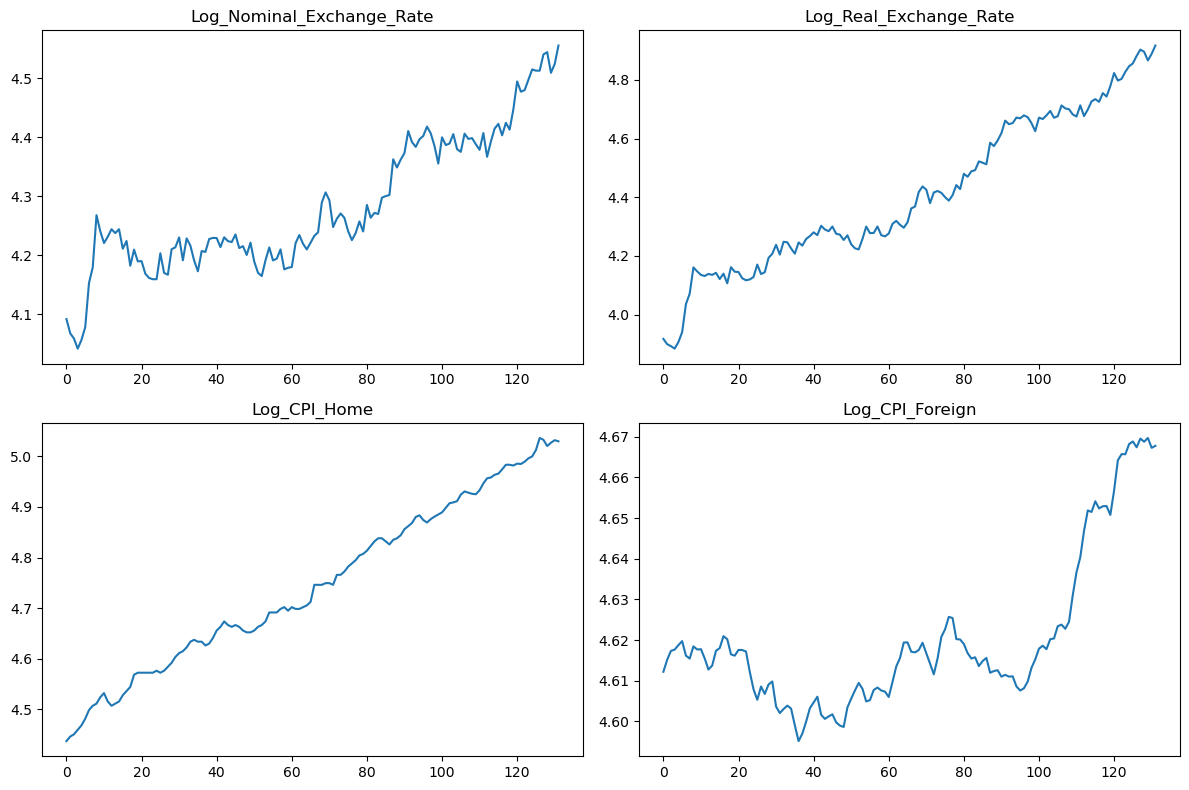

In [59]:
# Function to perform Augmented Dickey-Fuller test
def adf_test(series, title=''):
    result = adfuller(series, autolag='AIC')
    output = {'Test Statistic': result[0], 'p-value': result[1], 
              'Lags Used': result[2], 'Number of Observations Used': result[3]}
    for key, value in result[4].items():
        output[f'Critical Value ({key})'] = value
    print(title)
    print('--------------------------------------')
    for key, value in output.items():
        print(f'{key}: {value:.4f}')
    print('\n')

# Plotting the series and performing ADF test
plt.figure(figsize=(12, 8))

variables = ['Log_Nominal_Exchange_Rate', 'Log_Real_Exchange_Rate', 'Log_CPI_Home', 'Log_CPI_Foreign']

for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    Master_df[var].plot(title=var)
    plt.tight_layout()
    adf_test(Master_df[var], title=var)

plt.show()


In [60]:
Master_df['diff_Log_Nominal_Exchange_Rate'] = Master_df['Log_Nominal_Exchange_Rate'].diff().dropna()
Master_df['diff_Log_Real_Exchange_Rate'] = Master_df['Log_Real_Exchange_Rate'].diff().dropna()
Master_df['diff_Log_CPI_Home'] = Master_df['Log_CPI_Home'].diff().dropna()
Master_df['diff_Log_CPI_Foreign'] = Master_df['Log_CPI_Foreign'].diff().dropna()
print(Master_df)

          Date    CPI_Home  CPI_Foreign  Nominal_Exchange_Rate  \
0   2013-01-01   84.539369     100.7043              59.872002   
1   2013-02-01   85.304431     101.0018              58.455002   
2   2013-03-01   85.686962     101.2213              57.930000   
3   2013-04-01   86.452024     101.2553              56.952000   
4   2013-05-01   87.217086     101.3667              57.792999   
..         ...         ...          ...                    ...   
127 2023-08-01  153.364995     106.6516              93.724770   
128 2023-09-01  151.492003     106.5695              94.091171   
129 2023-10-01  152.483587     106.6673              90.855278   
130 2023-11-01  153.254819     106.4094              92.220200   
131 2023-12-01  152.900000     106.4612              95.158310   

     Real_Exchange_Rate  Log_Nominal_Exchange_Rate  Log_Real_Exchange_Rate  \
0             50.261421                   4.092209                3.917238   
1             49.370117                   4.068257 

In [61]:
df_new = Master_df.fillna(Master_df.mean())  # Fill with mean

C:\Users\Rashmi\AppData\Local\Temp\ipykernel_29356\2525623231.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_new = Master_df.fillna(Master_df.mean())  # Fill with mean


In [69]:
import statsmodels.api as sm
# Assuming the differenced series are stored as follows:
diff_nominal_exchange = df_new['diff_Log_Nominal_Exchange_Rate']
diff_cpi_relative = df_new['diff_Log_CPI_Home'] - df_new['diff_Log_CPI_Foreign']

# Regression for Relative PPP
X = sm.add_constant(diff_cpi_relative)  # Independent variable
model = sm.OLS(diff_nominal_exchange, X).fit()  # Dependent variable
print(model.summary())

                                  OLS Regression Results                                  
Dep. Variable:     diff_Log_Nominal_Exchange_Rate   R-squared:                       0.006
Model:                                        OLS   Adj. R-squared:                 -0.002
Method:                             Least Squares   F-statistic:                    0.7274
Date:                            Mon, 01 Apr 2024   Prob (F-statistic):              0.395
Time:                                    14:44:45   Log-Likelihood:                 306.68
No. Observations:                             132   AIC:                            -609.4
Df Residuals:                                 130   BIC:                            -603.6
Df Model:                                       1                                         
Covariance Type:                        nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

diff_Log_Nominal_Exchange_Rate
--------------------------------------
Test Statistic: -12.9671
p-value: 0.0000
Lags Used: 0.0000
Number of Observations Used: 131.0000
Critical Value (1%): -3.4813
Critical Value (5%): -2.8839
Critical Value (10%): -2.5787


diff_Log_Real_Exchange_Rate
--------------------------------------
Test Statistic: -12.4823
p-value: 0.0000
Lags Used: 0.0000
Number of Observations Used: 131.0000
Critical Value (1%): -3.4813
Critical Value (5%): -2.8839
Critical Value (10%): -2.5787


diff_Log_CPI_Home
--------------------------------------
Test Statistic: -8.5804
p-value: 0.0000
Lags Used: 6.0000
Number of Observations Used: 125.0000
Critical Value (1%): -3.4838
Critical Value (5%): -2.8850
Critical Value (10%): -2.5793


diff_Log_CPI_Foreign
--------------------------------------
Test Statistic: -1.4304
p-value: 0.5676
Lags Used: 12.0000
Number of Observations Used: 119.0000
Critical Value (1%): -3.4865
Critical Value (5%): -2.8862
Critical Value (10%): -2.5799



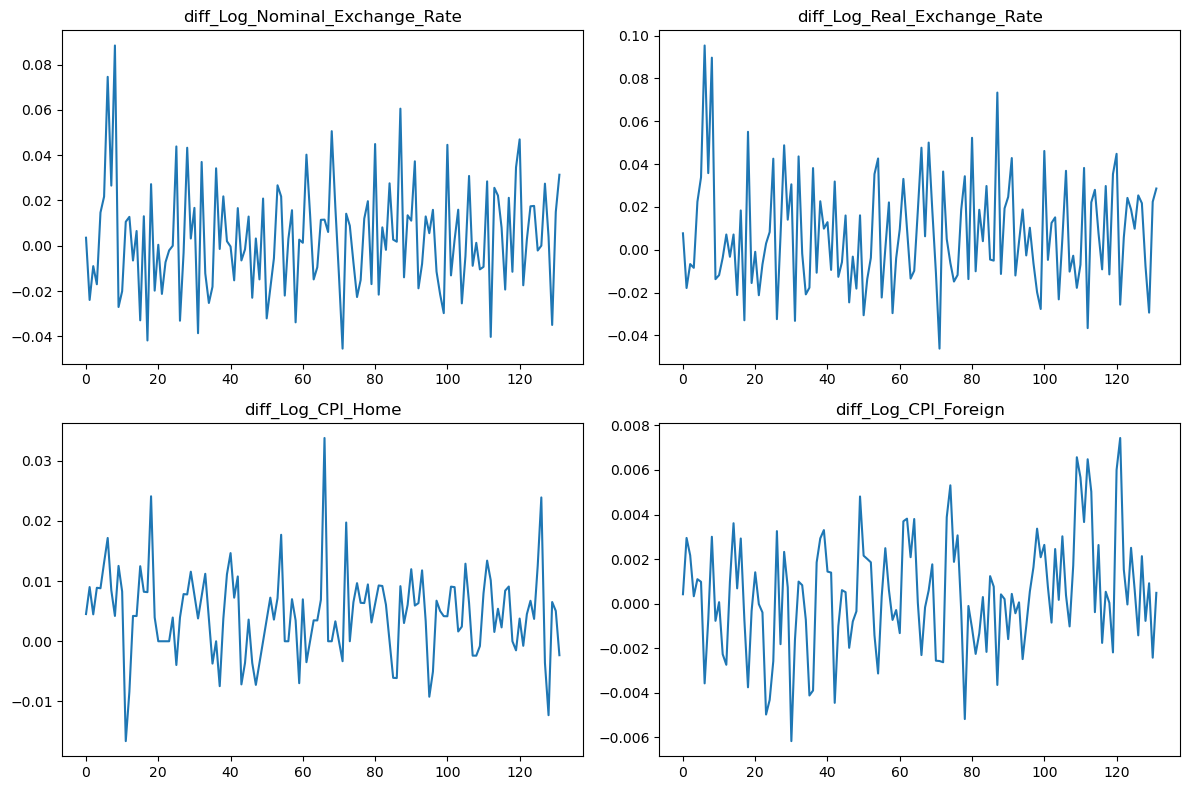

In [71]:
# Plotting the series and performing ADF test
plt.figure(figsize=(12, 8))

variables = ['diff_Log_Nominal_Exchange_Rate', 'diff_Log_Real_Exchange_Rate', 'diff_Log_CPI_Home', 'diff_Log_CPI_Foreign']

for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    df_new[var].plot(title=var)
    plt.tight_layout()
    adf_test(df_new[var], title=var)

plt.show()

In [70]:
from statsmodels.tsa.stattools import adfuller
# Assuming you have the log CPI data in two separate pandas Series or DataFrame columns
# Let's call them 'log_cpi_home' and 'log_cpi_foreign'

# Step 1: Perform linear regression
M = sm.add_constant(df_new['diff_Log_CPI_Foreign'])  # Add a constant term for the intercept
model = sm.OLS(df_new['diff_Log_CPI_Home'], M)
result = model.fit()

# Step 2: Obtain the residuals
residuals = result.resid

# Step 3: Test for stationarity
adf_result = adfuller(residuals)
adf_statistic = adf_result[0]
adf_p_value = adf_result[1]
critical_values = adf_result[4]

# Step 4: Interpret the results
print("ADF Statistic:", adf_statistic)
print("p-value:", adf_p_value)
print("Critical Values:")
for key, value in critical_values.items():
    print(f"\t{key}: {value}")

# Check if residuals are stationary (reject null hypothesis of non-stationarity)
if adf_p_value < 0.05:
    print("Residuals are stationary. Evidence of cointegration (supporting absolute PPP).")
else:
    print("Residuals are not stationary. No evidence of cointegration.")


ADF Statistic: -8.517937497722539
p-value: 1.1208053261556386e-13
Critical Values:
	1%: -3.4837793736959997
	5%: -2.88495387648
	10%: -2.579256976
Residuals are stationary. Evidence of cointegration (supporting absolute PPP).
